# 编译myfft
我自己写的基2-DIT-FFT

In [2]:
import os
os.system("g++ ./myfft.cpp -O3 -o ./exe/myfft -lpthread")
# os.system("./myfft 4 ./array/array_16_0.txt ./out.txt")

0

# 编译gen
用于生成测试数据

In [4]:
import os
os.system("g++ ./gen.cpp -O3 -o ./exe/gen")

0

# 编译测速myfft_timing

In [25]:
import os
os.system("g++ ./myfft_timing.cpp -O3 -o ./exe/myfft_timing -lpthread")

0

# 编译测速fftw3_timing

In [21]:
import os
os.system("g++ ./fftw3_timing.cpp -O3 -o ./exe/fftw3_timing -lfftw3")

0

# 运行gen
生成从$2^2$到$2^{23}$长的数组，每种10个

In [ ]:
import os
for i in range(2,24):
    print("./exe/gen "+str(i))

# 运行fftw3_timing

In [28]:
import os
for i in range(2,24):
    os.system("./exe/fftw3_timing "+str(i))

0.000495
0.000493
0.000519
0.000566
0.000515
0.000549
0.000580
0.000618
0.000633
0.000817
0.000917
0.001370
0.002120
0.003703
0.008297
0.017197
0.036068
0.089062
0.182180
0.375512
0.782970
1.678055


# 运行myfft_timing

In [27]:
import os
for i in range(2,24):
    os.system("./exe/myfft_timing "+str(i))

0.000646
0.000185
0.000237
0.000258
0.000303
0.000515
0.000353
0.000326
0.000419
0.000643
0.001026
0.002517
0.002873
0.010418
0.014390
0.031434
0.065079
0.128842
0.271394
0.564445
1.184179
2.347761


# 数组长度较小时，将采取多次测试取平均的办法减少误差

In [21]:
import subprocess
import numpy as np
string = "./exe/fftw3_timing"
for i in range(2,18):
    output = []
    for k in range(10):
        result = subprocess.run([string,str(i)], stdout=subprocess.PIPE)
        output.append(float((result.stdout.decode('utf-8'))))
    print("%.7f" % np.mean(output))

0.0004841
0.0004648
0.0004792
0.0005721
0.0005165
0.0005583
0.0005877
0.0006166
0.0006413
0.0007778
0.0009411
0.0014038
0.0020656
0.0036779
0.0085697
0.0174431


In [22]:
import subprocess
import numpy as np
string = "./exe/myfft_timing"
for i in range(2,18):
    output = []
    for k in range(10):
        result = subprocess.run([string,str(i)], stdout=subprocess.PIPE)
        output.append(float((result.stdout.decode('utf-8'))))
    print("%.7f" % np.mean(output))

0.0002121
0.0001999
0.0002194
0.0002319
0.0003365
0.0002762
0.0004319
0.0003575
0.0004628
0.0013335
0.0010498
0.0016672
0.0036552
0.0066837
0.0153729
0.0318146


# 绘图

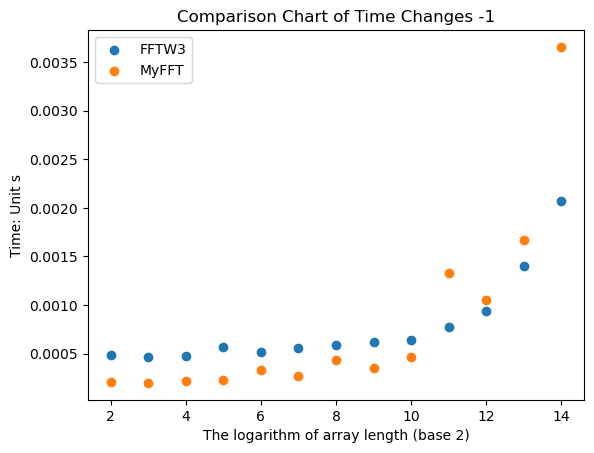

In [5]:
import matplotlib.pyplot as plt

x = [i for i in range(2,15)]
fftw3_y = [0.0004841,0.0004648,0.0004792,0.0005721,0.0005165,0.0005583,0.0005877,0.0006166, 
           0.0006413,0.0007778,0.0009411,0.0014038,0.0020656]
myfft_y = [0.0002121,0.0001999,0.0002194,0.0002319,0.0003365,0.0002762,0.0004319,0.0003575,
           0.0004628,0.0013335,0.0010498,0.0016672,0.0036552]
plt.scatter(x, fftw3_y, label='FFTW3')
plt.scatter(x, myfft_y, label='MyFFT')
plt.xlabel('The logarithm of array length (base 2)')
plt.ylabel('Time: Unit s')
plt.legend()
plt.title('Comparison Chart of Time Changes -1')
plt.show()

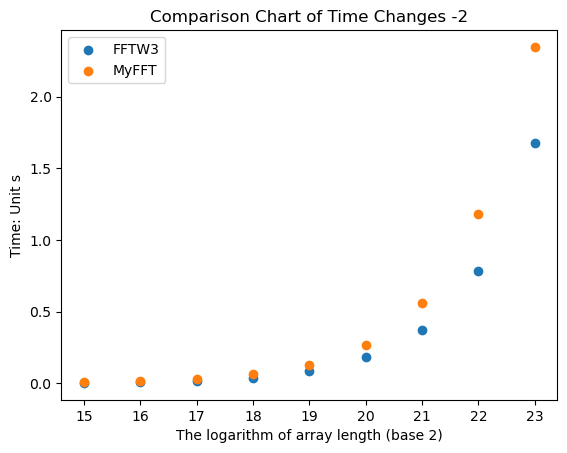

In [6]:
import matplotlib.pyplot as plt
x = [i for i in range(15,24)]
fftw3_y = [0.0036779,0.0085697,0.0174431,0.036068,0.089062,0.18218,0.375512,0.78297,1.678055]
myfft_y = [0.0066837,0.0153729,0.0318146,0.065079,0.128842,0.271394,0.564445,1.184179,2.347761]
plt.scatter(x, fftw3_y, label='FFTW3')
plt.scatter(x, myfft_y, label='MyFFT')
plt.xlabel('The logarithm of array length (base 2)')
plt.ylabel('Time: Unit s')
plt.legend()
plt.title('Comparison Chart of Time Changes -2')
plt.show()

# 表格对比

|2的幂次| fftw3用时（单位：s）   | myfft用时（单位：s）   | myfft 用时/fftw3 用时   |
|------------|------------|------------|--------------|
|2| 0.0004841  | 0.0002121  | 0.438132617  |
|3| 0.0004648  | 0.0001999  | 0.430077453  |
|4| 0.0004792  | 0.0002194  | 0.457846411  |
|5| 0.0005721  | 0.0002319  | 0.405348715  |
|6| 0.0005165  | 0.0003365  | 0.651500484  |
|7| 0.0005583  | 0.0002762  | 0.494716102  |
|8| 0.0005877  | 0.0004319  | 0.734898758  |
|9| 0.0006166  | 0.0003575  | 0.57979241   |
|10| 0.0006413  | 0.0004628  | 0.72165913   |
|11| 0.0007778  | 0.0013335  | 1.714451016  |
|12| 0.0009411  | 0.0010498  | 1.115503135  |
|13| 0.0014038  | 0.0016672  | 1.187633566  |
|14| 0.0020656  | 0.0036552  | 1.769558482  |
|15| 0.0036779  | 0.0066837  | 1.817259849  |
|16| 0.0085697  | 0.0153729  | 1.793866763  |
|17| 0.0174431  | 0.0318146  | 1.823907448  |
|18| 0.036068   | 0.065079   | 1.804341799  |
|19| 0.089062   | 0.128842   | 1.446655139  |
|20| 0.18218    | 0.271394   | 1.489702492  |
|21| 0.375512   | 0.564445   | 1.503134387  |
|22| 0.78297    | 1.184179   | 1.512419377  |
|23| 1.678055   | 2.347761   | 1.399096573  |
